In [38]:
import pandas as pd
import numpy as np

In [39]:
rent_data = pd.read_csv("../data/curated/rent_cleaned.csv", index_col=0)
rent_data

,suburb,postcode,latitude,longitude,isNewDevelopment,bathrooms,bedrooms,carspaces,propertyTypes,status,channel,price_per_week
0,Mount Martha,3934,-38.268818,145.014034,False,3,3,2,house,live,residential,1600.0
1,Bentleigh East,3165,-37.909091,145.055152,False,2,3,2,house,live,residential,780.0
2,Ferntree Gully,3156,-37.890452,145.267922,False,1,3,2,house,live,residential,585.0
3,Frankston North,3200,-38.115353,145.163260,False,1,3,2,house,live,residential,475.0
4,Camberwell,3124,-37.840108,145.094830,False,1,2,1,house,live,residential,590.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2957,Melbourne,3000,-37.809580,144.960120,False,1,2,0,apartmentUnitFlat,live,residential,680.0
2958,Melbourne,3000,-37.810002,144.958818,False,2,2,0,apartmentUnitFlat,live,residential,800.0
2959,Capel Sound,3940,-38.372306,144.884492,False,1,3,2,house,live,residential,500.0
2960,Bendigo,3550,-36.759161,144.267363,False,1,3,1,house,live,residential,560.0


### Scatter Plots for Numerical Features

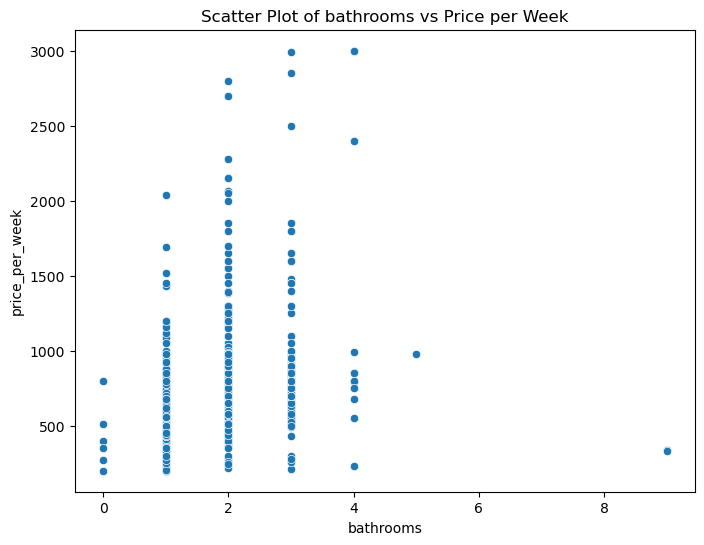

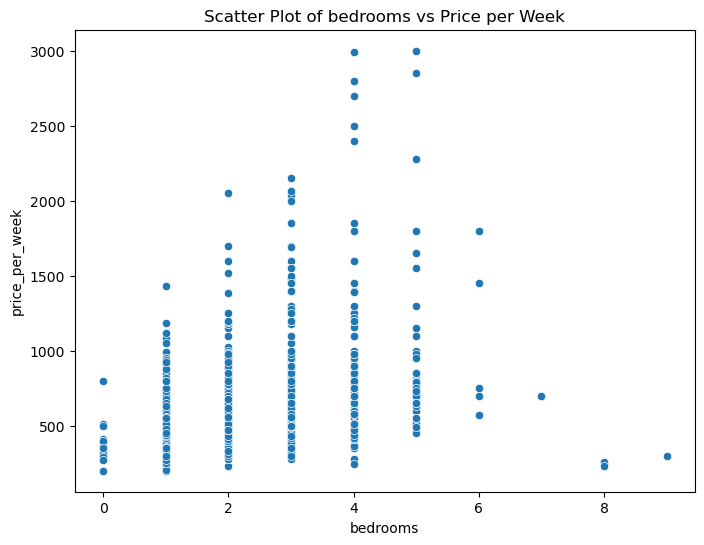

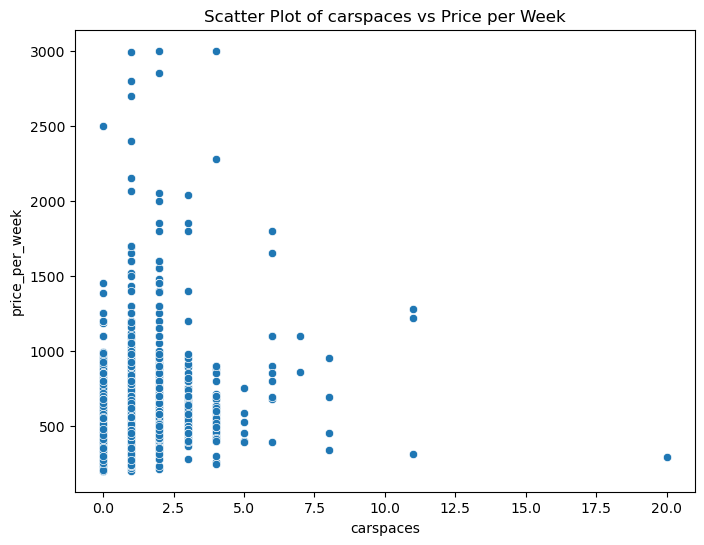

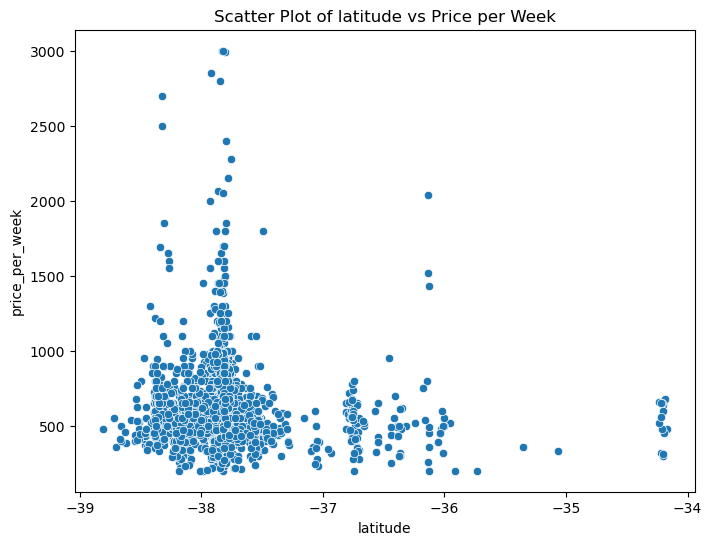

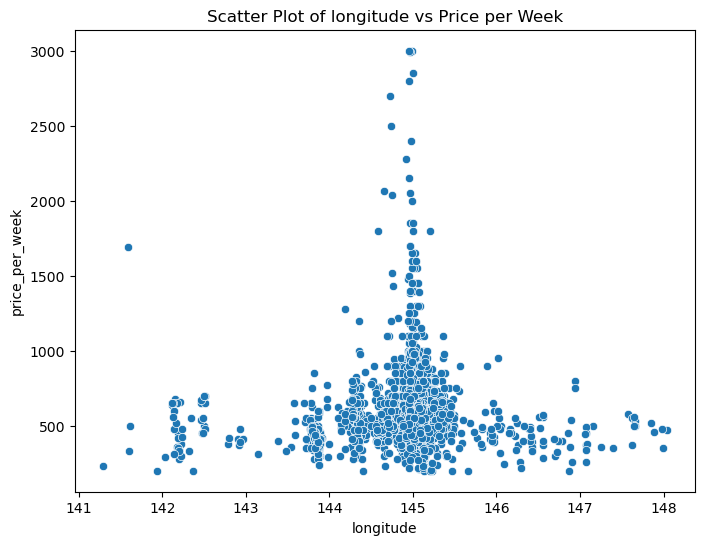

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

continuous_features = ["bathrooms", "bedrooms", "carspaces", "latitude", "longitude"]

for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=rent_data, x=feature, y="price_per_week")
    plt.title(f"Scatter Plot of {feature} vs Price per Week")
    plt.show()

### Box Plots for Categorical Features

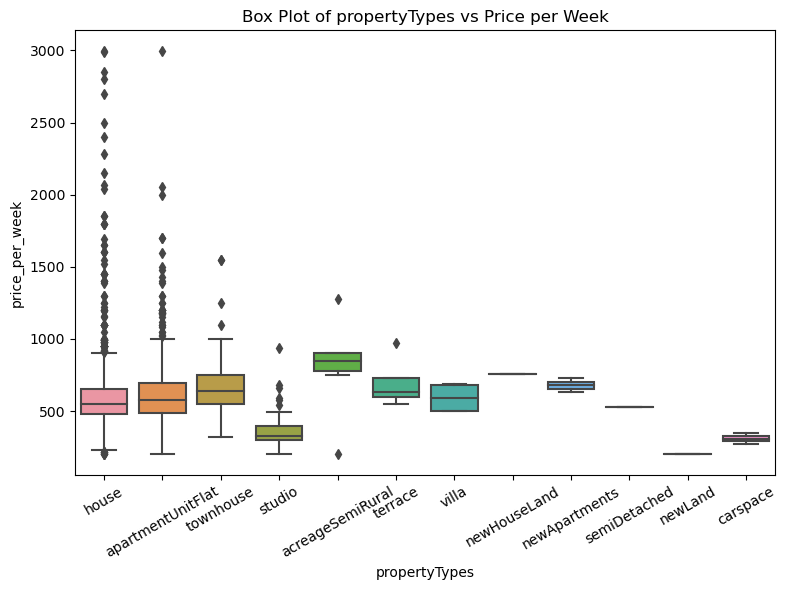

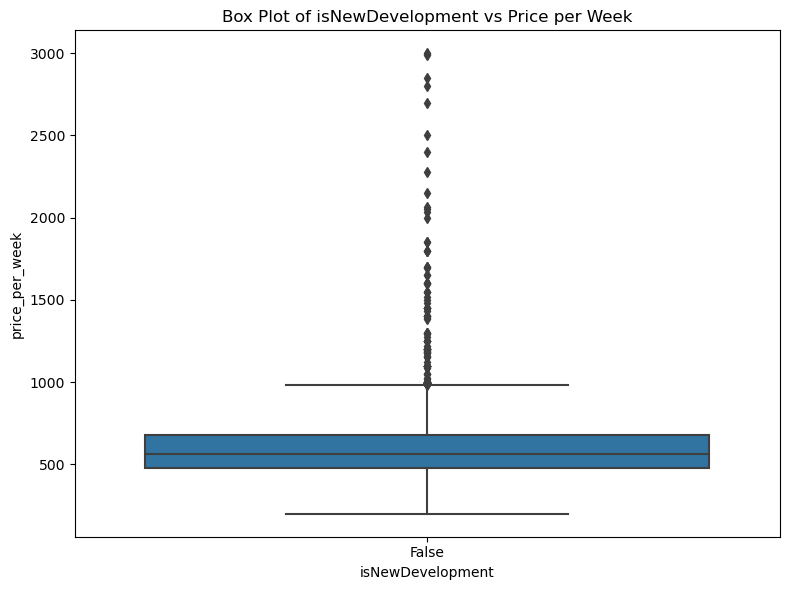

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_features = ["propertyTypes", "isNewDevelopment"]

# Loop to create separate plots
for feature in categorical_features:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.boxplot(data=rent_data, x=feature, y="price_per_week")
    plt.title(f"Box Plot of {feature} vs Price per Week")
    
    # Rotate the x-axis labels if needed
    if feature == "propertyTypes":
        plt.xticks(rotation=30)
    
    plt.tight_layout()  # Ensure layout fits well
    plt.show()

### Distribution Plot for the Target Variable

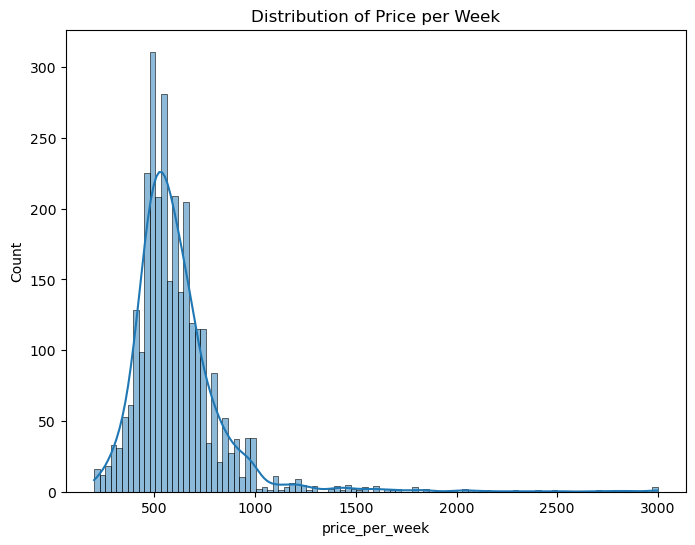

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(rent_data["price_per_week"], kde=True)
plt.title("Distribution of Price per Week")
plt.show()

### Heatmap for Correlations

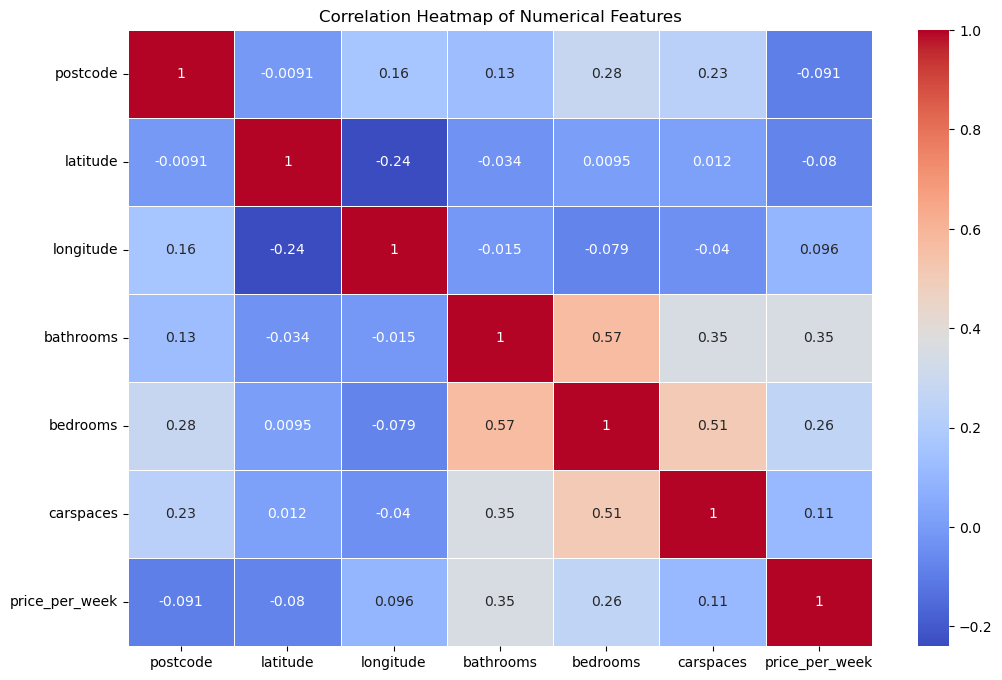

In [16]:
# Select only numeric columns
numeric_data = rent_data.select_dtypes(include=["float64", "int64"])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### check postcode `3000`

In [24]:
# 找到postcode列的最小值和最大值
min_postcode = rent_data['postcode'].min()
max_postcode = rent_data['postcode'].max()

print(f"The range of the postcode: {min_postcode} to {max_postcode}")

The range of the postcode: 3000 to 3996


In [26]:
# Define Melbourne CBD postcodes
melbourne_cbd_postcodes = [3000, 3001, 3002, 3003, 3004, 3005, 3006, 3008]

# Filter data for Melbourne CBD
melbourne_cbd_data = rent_data[rent_data['postcode'].isin(melbourne_cbd_postcodes)]

# Calculate the percentage
total_entries = len(rent_data)
melbourne_cbd_entries = len(melbourne_cbd_data)
percentage = (melbourne_cbd_entries / total_entries) * 100

# Display the result
print(f"Percentage of Melbourne CBD data: {percentage:.2f}%")

Percentage of Melbourne CBD data: 13.34%


In [28]:
# Group by postcode and count the number of entries for each
postcode_counts = rent_data['postcode'].value_counts()

# Calculate the percentage for each postcode
postcode_percentage = (postcode_counts / len(rent_data)) * 100

# Find the postcode with the highest percentage
max_postcode = postcode_percentage.idxmax()
max_percentage = postcode_percentage.max()

# Display the results
print(f"Postcode with the highest percentage: {max_postcode} ({max_percentage:.2f}%)")

# If you want to see all postcodes and their percentages
print(postcode_percentage)

Postcode with the highest percentage: 3000 (7.43%)
postcode
3000    7.427414
3029    3.409858
3006    2.937205
3350    2.025658
3141    1.924375
          ...   
3167    0.033761
3153    0.033761
3835    0.033761
3666    0.033761
3851    0.033761
Name: count, Length: 333, dtype: float64


In [32]:
# Filter data for Melbourne CBD (postcode 3000)
melbourne_cbd_postcodes = [3000]
melbourne_cbd_data = rent_data[rent_data['postcode'].isin(melbourne_cbd_postcodes)]

### Scatter Plots for Numerical Features

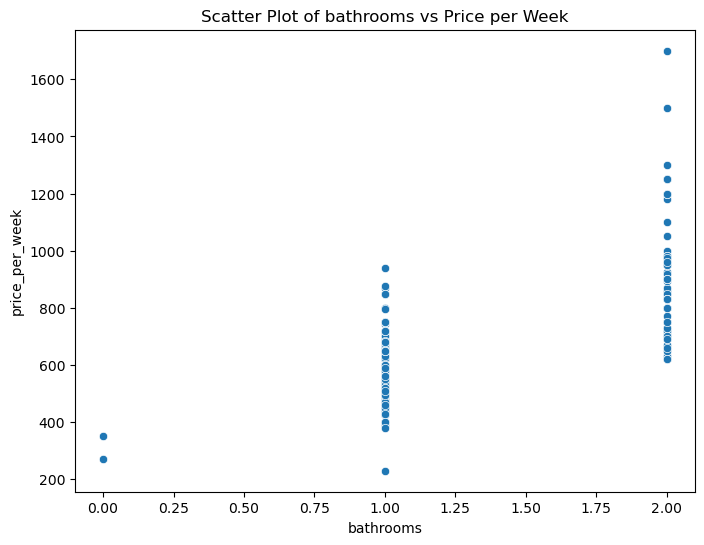

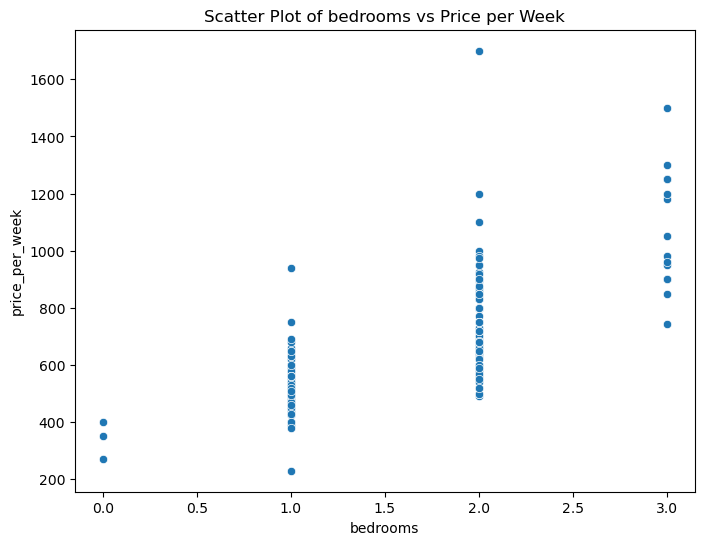

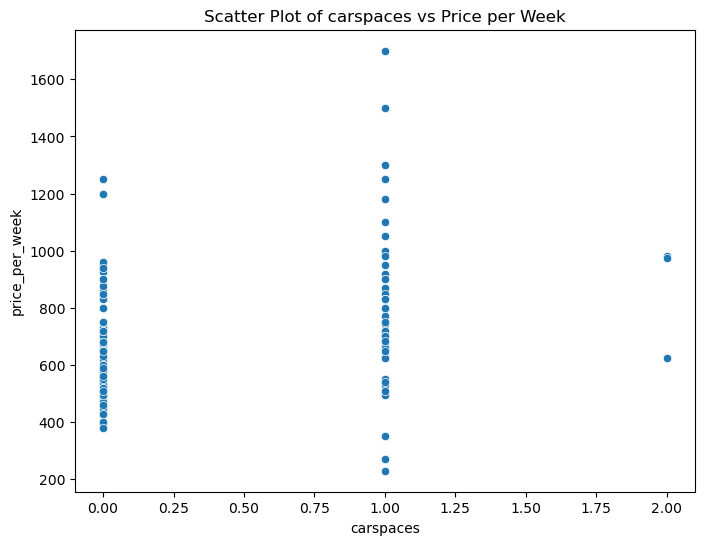

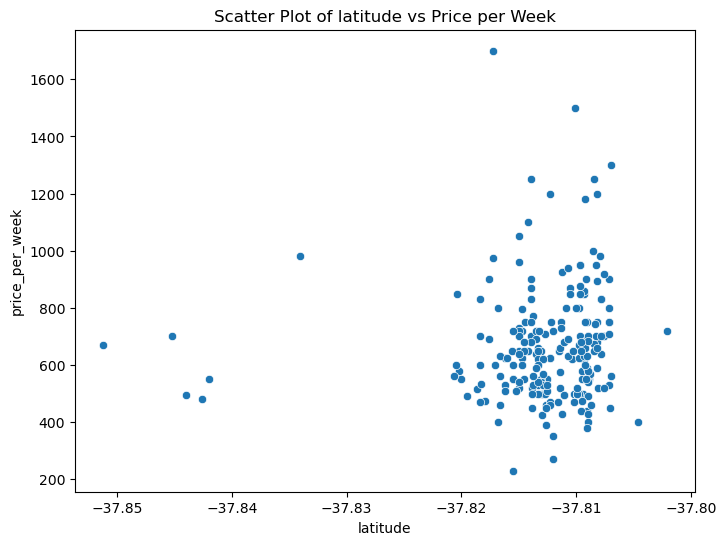

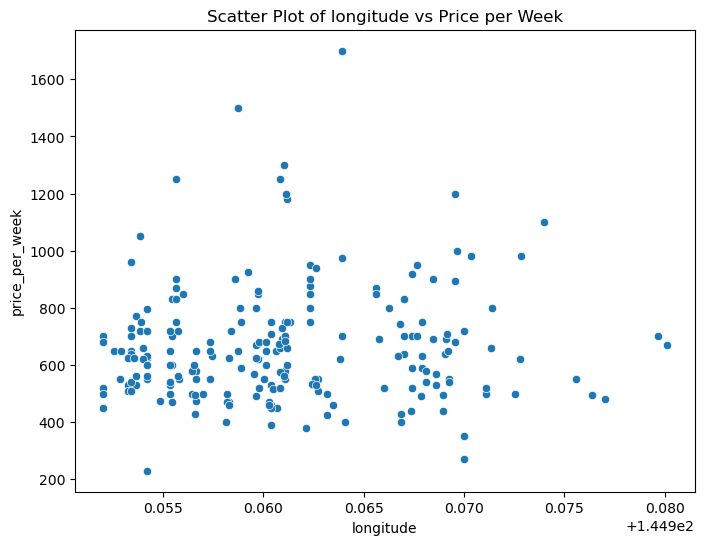

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

continuous_features = ["bathrooms", "bedrooms", "carspaces", "latitude", "longitude"]

for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(melbourne_cbd_data, x=feature, y="price_per_week")
    plt.title(f"Scatter Plot of {feature} vs Price per Week")
    plt.show()

### Box Plots for Categorical Features

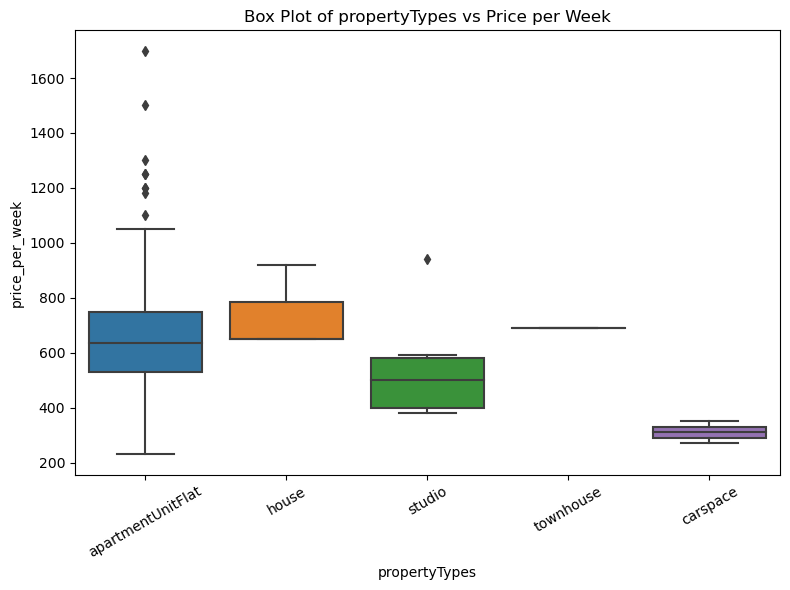

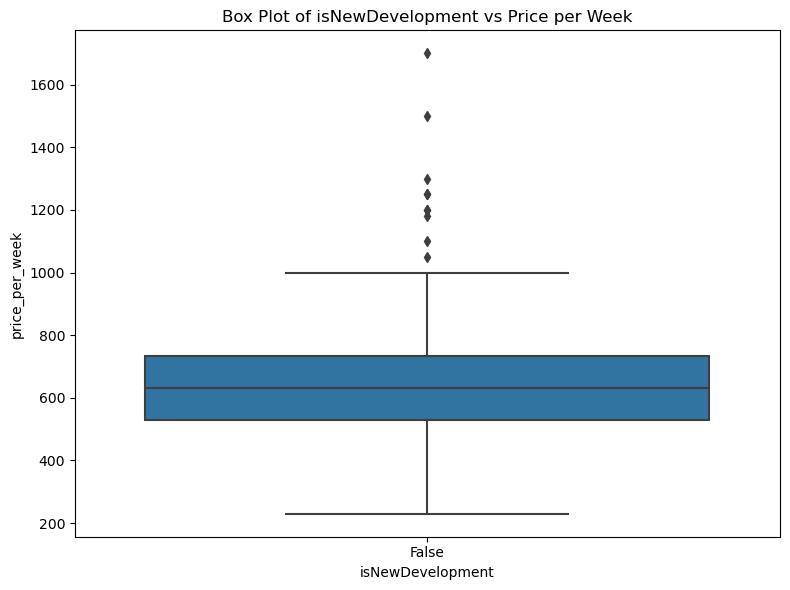

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_features = ["propertyTypes", "isNewDevelopment"]

# Loop to create separate plots
for feature in categorical_features:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.boxplot(data=melbourne_cbd_data, x=feature, y="price_per_week")
    plt.title(f"Box Plot of {feature} vs Price per Week")
    
    # Rotate the x-axis labels if needed
    if feature == "propertyTypes":
        plt.xticks(rotation=30)
    
    plt.tight_layout()  # Ensure layout fits well
    plt.show()

### Distribution Plot for the Target Variable

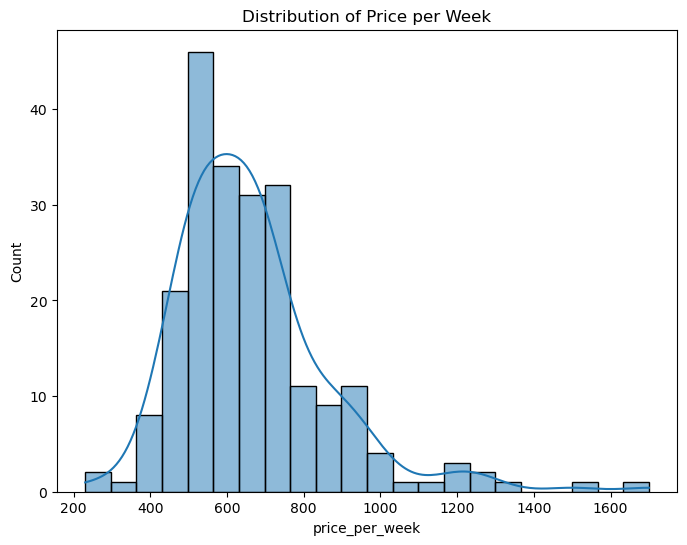

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(melbourne_cbd_data["price_per_week"], kde=True)
plt.title("Distribution of Price per Week")
plt.show()

### Heatmap for Correlations

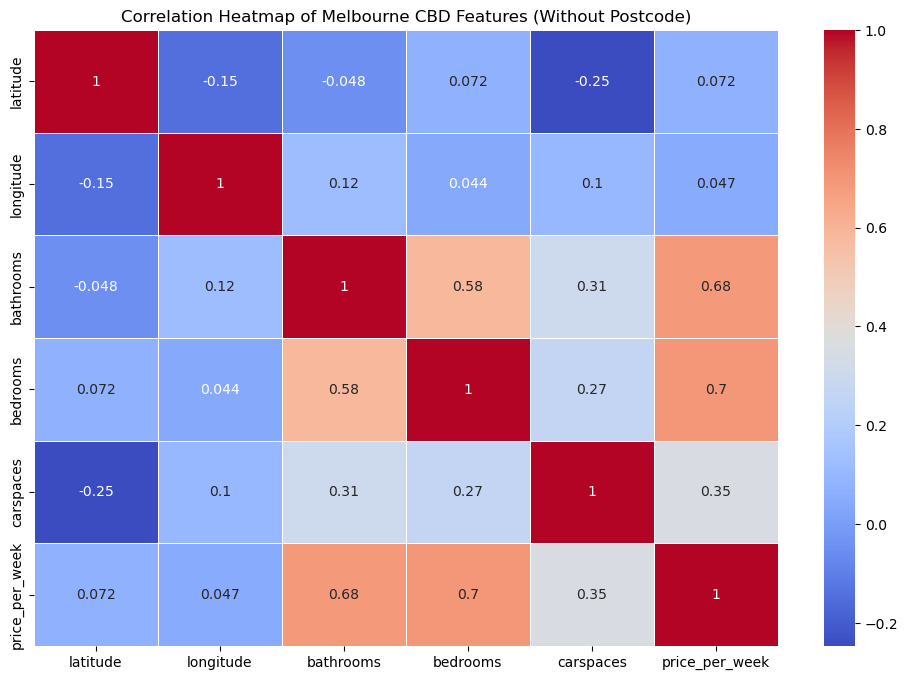

In [33]:
# Select only numeric columns and drop 'postcode'
melbourne_cbd_numeric_data = melbourne_cbd_data.select_dtypes(include=["float64", "int64"]).drop(columns=["postcode"])

# Generate the heatmap for Melbourne CBD data without 'postcode'
plt.figure(figsize=(12, 8))
sns.heatmap(melbourne_cbd_numeric_data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Melbourne CBD Features (Without Postcode)")
plt.show()